## 1、Question(提出问题)
#### 理解列名：
PassengerId => 乘客ID，不可影响生还，忽略<br>
Survived => 获救情况（1为获救，0为未获救）<br>
Pclass => 乘客等级/船舱等级(1/2/3等舱位),这个较可能影响获救，权贵容易特殊照顾<br>
Name => 乘客姓名，感觉不能影响获救，忽略<br>
Sex => 性别，女性易受保护，有可能<br>
Age => 年龄，有可能<br>
SibSp => 堂兄弟/妹个数，有可能<br>
Parch => 父母与小孩个数，有可能<br>
Ticket => 船票信息，票编号 感觉不可能<br>
Fare => 票价，有可能，高价可代表着权贵<br>
Cabin => 客舱信息，有可能，因为可能距离救生艇的距离近容易获救<br>
Embarked => 登船港口，有可能，比如：发达的港口代表着地位不一样<br>

#### 接下来要去探索的问题：
- 舱室等级 对存活率的影响
- 性别 对存活率的影响
- 年龄 对存活率的影响
- 客舱信息 对存活率的影响
- 舱室等级与性别的综合因素 对存活率的影响

当然，还有其它可探讨的，如SibSp、Parch等。

## 2、Wrangle(数据整理)

### 2.1 采集数据

In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# from matplotlib.font_manager import FontProperties

# mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd 
import numpy as np 
from pandas import Series,DataFrame

#用pandas.read_csv()方法读入本地的csv格式
#读入后数据的类型默认是DataFrame
data_train = pd.read_csv('titanic-data.csv') #原数据，在后面不会更改，用于与数据清理后的对比


In [64]:
data_train.head() #用DataFrame.head()方法得到它的前几行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data_train.info() #用DataFrame.info()方法得到它的列变量信息。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


由以上数据可见，Age, Cabin, Embarked, 信息不全，没达到891条。为了使将要分析的变量保持一致的数据量，我们需要进行数据清洗，生成一个新的数据集，再对新的数据集进行分析探索。


### 2.2 整理数据

Age、Cabin、Embarked 变量存在缺失值。其中Embarked和Age的缺失值较少，可以直接用众数和中位数插补。<br>
其中，Embarked会出现3种字符，分别用数字0\1\2替代 使数值化，Sex也是


#### 2.2.1 对Cabin的缺失值 处理
由于Cabin缺失值较多，可以考虑比较有Cabin数据和无Cabin数据的乘客存活情况

In [92]:
# 获取 Cabin 为空的数据
nan_cabin = data_train[data_train['Cabin'].isnull()==True]
nan_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


- 分类‘Cabin有数据’为1、‘Cabin无数据’为0，对数据集进行填充

In [93]:
# test_train 用于数据清理,  data_train 原数据不动它，后面可用于对比
test_train = pd.read_csv('titanic-data.csv') 

# 对test_train中Cabin 空值 填0 ，非空值 填1
test_train.loc[test_train['Cabin'].isnull() == False,'Cabin'] = 1
test_train.loc[test_train['Cabin'].isnull(),'Cabin'] = 0

print test_train.head() # 清理后的数据
data_train.head() # 对比 原数据


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  Cabin Embarked  
0      0         A/5 21171   7.2500      0        S  
1      0          PC 17599  71.2833      1        C  
2      0  STON/O2. 3101282   7.9250      0        S  
3      0            113803  53.1000      1        S  
4      0            373450   8.0500      0        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


对比清理后、清理前，此时Cabin列为NaN的，填充为0，非NaN填充为1，已完成


/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling ba

/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling ba

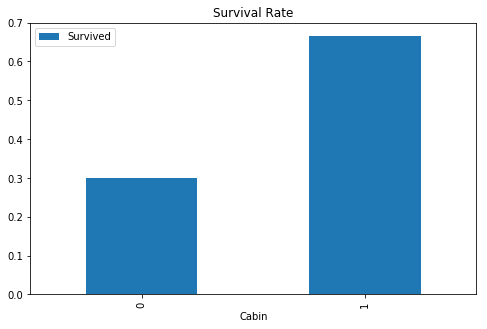

In [98]:
# 看看有Cabin、无Cabin情况下获救率
test_train.pivot_table(index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))  
plt.title('Survival Rate') 
plt.show()

上图显示，在有Cabin数据的乘客的存活率远高于无Cabin数据的乘客，所以我们可以将Cabin的有无数据作为一个特征。

#### 2.2.2 对于Age列的缺失值处理
可使用median（）函数获取中值 进行填充

In [99]:
# 对Age列 空值 填充 median
test_train['Age']=test_train['Age'].fillna(test_train['Age'].median())   #fillna（）表示补充

#### 2.2.3 对于Embarked列的缺失值处理、数值化处理

In [100]:
print(test_train['Embarked'].unique()) 

def sub_by_value(df, column, value):
    return df.loc[df[column]==value, column]

print len(sub_by_value(test_train, 'Embarked', 'S')) #644
print len(sub_by_value(test_train, 'Embarked', 'C')) #168
print len(sub_by_value(test_train, 'Embarked', 'Q')) #77

#loc是通过行标签索引行数据，iloc是通过行号获取行数据
test_train['Embarked']=test_train['Embarked'].fillna('S')  
test_train.loc[test_train['Embarked']=='S','Embarked']=0  
test_train.loc[test_train['Embarked']=='C','Embarked']=1  
test_train.loc[test_train['Embarked']=='Q','Embarked']=2  

print(test_train['Embarked'].unique()) 

['S' 'C' 'Q' nan]
644
168
77
[0 1 2]


#### 2.2.4 对于Sex列的数值化处理

In [104]:
print(test_train['Embarked'].unique()) 
test_train.loc[test_train['Sex']=='male','Sex']=0  
test_train.loc[test_train['Sex']=='female','Sex']=1 
print(test_train['Embarked'].unique()) 

[0 1 2]


TypeError: invalid type comparison

In [52]:
test_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
AgeLevel       891 non-null category
dtypes: category(1), float64(2), int64(8), object(2)
memory usage: 84.5+ KB


ok, 看完info() ,没有null 和 缺省值了，处理完毕

## 3、Explore(数据探索)

### 3.0 总体生还率

In [53]:
print 'Survied rate:' ,test_train['Survived'].mean()

Survied rate: 0.383838383838


### 3.1 探索 舱室等级 对存活率的影响

/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling ba

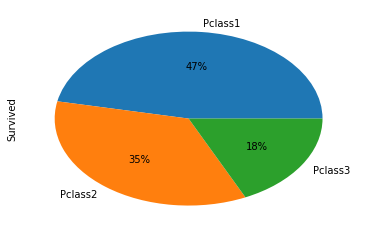

In [97]:
#看看各乘客等级的获救情况
survived_pclass = test_train.groupby('Pclass')['Survived'].mean()
survived_pclass.plot(kind='pie',autopct='%.0f%%',labels=['Pclass1','Pclass2','Pclass3'])


### 3.2 探索 性别 对存活率的影响

/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling ba

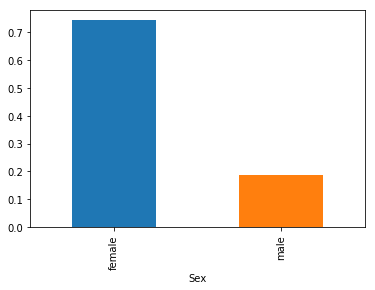

In [95]:
test_train.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.show()

### 3.3 探索 年龄 对存活率的影响

In [82]:
# def prediction_with_interval_factor(survived, factor, factor_group, bins, title, xlabel, ylabel):
#     """
#     基于区间因素的预测
#     survived：存活
#     factor：特征
#     factor_group：特征分组的组名
#     bins：分组区间
#     blabels：分组区间标签
#     title：图形标题
#     xlabel：x轴标签
#     ylabel：y轴标签
#     """
#     # 根据给定的区间进行分组
#     test_train[factor_group] = pd.cut(test_train[factor], bins)

#     factor_df = pd.concat([test_train[survived], test_train[factor_group]], axis = 1)

#     df_grouped = factor_df.groupby(factor_group)
#     # 统计每组生存者的总数
#     grouped_survied_factors = df_grouped.sum()
#     # 统计分组总有人数
#     grouped_each_factor_counts = df_grouped.count()

#     # 计算存活率
#     survived_rate = grouped_survied_factors / grouped_each_factor_counts

#     # 绘制直方图与饼图
#     survived_rate.plot(kind = 'bar')
    
#     plt.title(title)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
    
#     survived_rate.plot(kind = 'pie', subplots = True)
#     plt.ylabel('')
    
#     plt.show()
    
# bins=[0, 10, 18, 35, 60 , 80]

# prediction_with_interval_factor('Survived', 'Age', 'AgeLevel', bins, 'Age Survival Rate', 'Age', 'Density')


图示，只有不到十岁的小孩存活率会高于50%

### 3.4 客舱信息 对存活率的影响

Text(0.5,1,'Survival')

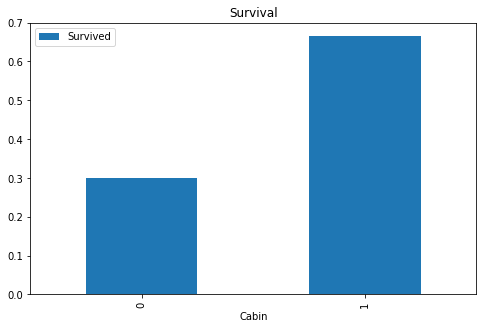

In [40]:
test_train.pivot_table(index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))  
plt.title('Survival') 

从图可以看出，有Cabin信息的生还率大大提高，超过60%

### 3.5 舱室等级与性别的综合因素 对存活率的影响

### 3.2、属性与获救结果关联统计

#### 可见：明显等级为1的乘客，获救的概率高很多

0    468
1    109
Name: Survived, dtype: int64
1    233
0     81
Name: Survived, dtype: int64


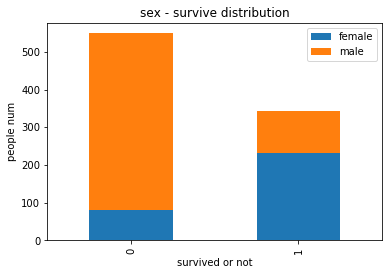

In [157]:
#看看各性别的获救情况


# Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
# Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()

Survived_m = test_train.Survived[test_train.Sex == 0].value_counts()
print Survived_m
Survived_f = test_train.Survived[test_train.Sex == 1].value_counts()
print Survived_f
df=pd.DataFrame({u'male':Survived_m, u'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"sex - survive distribution")
plt.xlabel(u"survived or not") 
plt.ylabel(u"people num")
plt.show()

#### 可见，未获救的人中 男性占比远大于女性，获救的人中 女性占比远大于男性

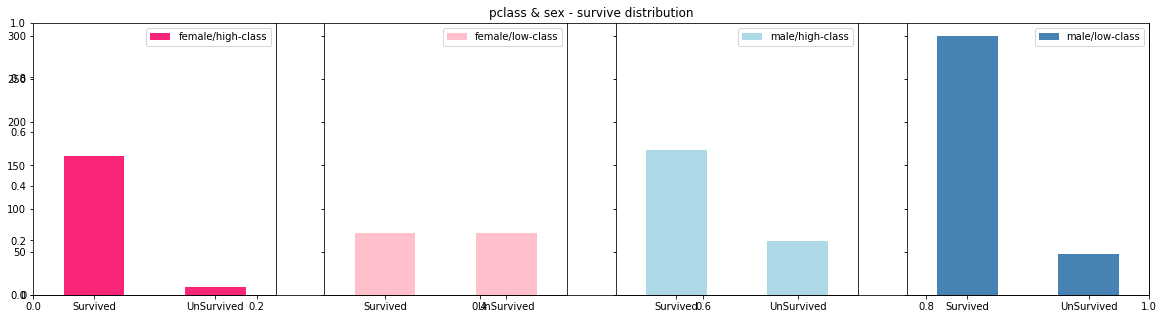

#### 看图更加证明，女性、高级仓 获救率之高

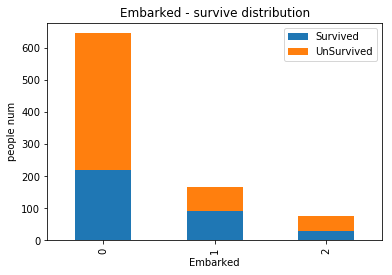

In [173]:
# 我们看看各登船港口的获救情况。

Survived_0 = test_train.Embarked[test_train.Survived == 0].value_counts()
Survived_1 = test_train.Embarked[test_train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'UnSurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Embarked - survive distribution")
plt.xlabel(u"Embarked") 
plt.ylabel(u"people num") 

plt.show()

#### 没明显特征

In [176]:
# 下面我们来看看 堂兄弟/妹，孩子/父母有几人，对是否获救的影响。

g = test_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print df

g = test_train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print df

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


#### 对比数据，没发现明显特征

### 3.3、相关性计算分析

In [200]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
#     print std_x.head(), '--', len(std_x)
#     print std_y.head(), '--', len(std_y)
#     print (std_x * std_y).head(), '--', len(std_x * std_y)
    
    return (std_x * std_y).mean()

Survived_s = test_train['Survived']
Sex_s = test_train['Sex']
Pclass_s = test_train['Pclass']
Age_s = test_train['Age']
Cabin_s = test_train['Cabin']

print correlation(Survived_s, Sex_s)
print correlation(Survived_s, Pclass_s)
print correlation(Survived_s, Age_s)
print correlation(Survived_s, Cabin_s)



0.5433513806577474
-0.338481035961
-0.0649104199305
0.3169115231122944


#### 可见，仍然是性别、等级，相关性最强，有客舱信息 相关性也较强

## 4 结论
#### 根据统计分布图、皮尔逊相关性，得出结论： ***女性、高级仓 获救率最高，即影响获救最重的因素是：Sex、Pclass***
******

参考网站：
    http://pandas.pydata.org/pandas-docs/stable/api.html
    https://blog.csdn.net/zhuhengv/article/details/50540254
    https://blog.csdn.net/vvvict0r/article/details/78165584
    https://blog.csdn.net/xun527/article/details/78578460
    https://www.cnblogs.com/mxwbq/p/7106123.html?utm_source=itdadao&utm_medium=referral
    https://blog.csdn.net/guoxinian/article/details/73740746
    https://blog.csdn.net/wydyttxs/article/details/76695205
    